In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data['Age Category'] = ['iGen' if 0<age<25 else 'Millenials' if 24<age<40 else 'GenX' if 39<age<56 else 'BabyBoomers' if 55<age<74 else None \
 for age in list(data['Age'].values)]

In [4]:
data['Income Category'] = pd.qcut(data['EstimatedSalary'],3,labels=['Low','Medium','High'])

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,Male,19,19000,0,iGen,Low
1,15810944,Male,35,20000,0,Millenials,Low
2,15668575,Female,26,43000,0,Millenials,Low
3,15603246,Female,27,57000,0,Millenials,Medium
4,15804002,Male,19,76000,0,iGen,Medium


In [11]:
#creating a LabelEncoder object for gender, Age category and Income category
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
data['Gender']=le.fit_transform(data['Gender'])
data['Age Category']=le.fit_transform(data['Age Category'])
data['Income Category']=le.fit_transform(data['Income Category'])

In [12]:
data['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [13]:
data['Age Category'].value_counts()

2    195
1    134
3     43
0     28
Name: Age Category, dtype: int64

In [14]:
data['Income Category'].value_counts()

2    138
1    134
0    128
Name: Income Category, dtype: int64

In [15]:
# split data into features and target
x = data[['Gender', 'Age Category', 'Income Category']]
y=data['Purchased']

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=42)

## Naive Bayes Algorithm

In [16]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None)

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [18]:
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.8833333333333333
Precision:  0.9024390243902439
Recall:  0.7872340425531915


In [19]:
# calculate ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)

ROC AUC 0.8662197610026231


In [21]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

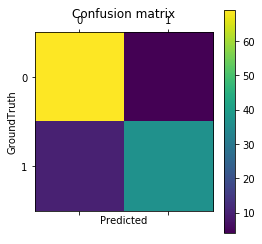

[[69  4]
 [10 37]]


In [22]:
conftable(y_test,y_pred,"conf")

In [23]:
# Ground Truth
pd.Series(y_test).value_counts()

0    73
1    47
Name: Purchased, dtype: int64

## Logistic Regression Algorithm

In [24]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy:  0.8583333333333333
Precision:  0.96875
Recall:  0.6595744680851063
ROC AUC 0.82293791897406


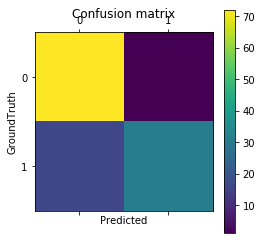

[[72  1]
 [16 31]]


In [27]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

## Random Forest Algorithm

In [28]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy:  0.8833333333333333
Precision:  0.8
Recall:  0.9361702127659575
ROC AUC 0.8927426406295542


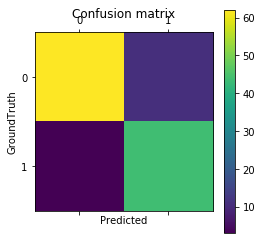

[[62 11]
 [ 3 44]]


In [30]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

## Extra Algorithm/ Model 4(Xgboost)

In [31]:
import xgboost as xgb
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgb = xgboost.fit( x_train, y_train)
y_pred = xgb.predict(x_test)

C:\Users\CHARLIE\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy:  0.8833333333333333
Precision:  0.851063829787234
Recall:  0.851063829787234
ROC AUC 0.877586709414165


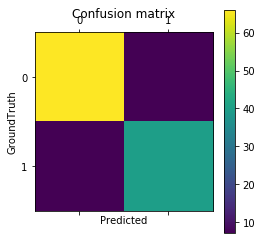

[[66  7]
 [ 7 40]]


In [32]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")